In [1]:
import src.unconstrained_min as t
import numpy as np
import tests.examples as e 


In [2]:
# Initialize a minimizer object:
minimizer = t.UnconstrainedOptimizer()

In [149]:
# Minimze first example from examples:

x0 = np.array([-1,2])
paths = []

print ('Gradient descent no line search:') 
minimizer.minimize(e.Rosenbrock, x0, 'gradient', line_search=False, max_iter=10000 )
print(f'Convergence: {minimizer.success}')
paths.append(minimizer.path)
print('--------------')
print('Gradient descent with line search:')
minimizer.minimize(e.Rosenbrock, x0, 'gradient', max_iter=10000)
print(f'Convergence: {minimizer.success}')
paths.append(minimizer.path)
print('--------------')
print('Newton Method no line search:')
minimizer.minimize(e.Rosenbrock, x0, 'newton', line_search=False, max_iter=10000)
print(f'Convergence: {minimizer.success}')
paths.append(minimizer.path)
print('--------------')
print('Newton Method with line search:')
minimizer.minimize(e.Rosenbrock, x0, 'newton', max_iter=10000)
print(f'Convergence: {minimizer.success}')
paths.append(minimizer.path)

Gradient descent no line search:
Terminated. Current point: [nan nan], Current objective: nan, Succeeded: False
Convergence: False
--------------
Gradient descent with line search:


/Users/baselmassarweh/Desktop/NumericalOptimization/numerical_optimization_hw/programming_assignment1/tests/examples.py:52: RuntimeWarning: overflow encountered in scalar power
  f = 100*(x2 - x1**2)**2 + (1 - x1)**2
/Users/baselmassarweh/Desktop/NumericalOptimization/numerical_optimization_hw/programming_assignment1/tests/examples.py:53: RuntimeWarning: overflow encountered in scalar power
  g = np.array([ -400*x1*(x2 - x1**2) - 2*(1 - x1), 200*(x2 - x1**2) ])
/Users/baselmassarweh/Desktop/NumericalOptimization/numerical_optimization_hw/programming_assignment1/src/unconstrained_min.py:205: RuntimeWarning: invalid value encountered in scalar subtract
  obj_diff = np.abs(next_f - current_f)
/Users/baselmassarweh/Desktop/NumericalOptimization/numerical_optimization_hw/programming_assignment1/tests/examples.py:52: RuntimeWarning: invalid value encountered in scalar subtract
  f = 100*(x2 - x1**2)**2 + (1 - x1)**2
/Users/baselmassarweh/Desktop/NumericalOptimization/numerical_optimization_h

Terminated. Current point: [0.99998297 0.99996579], Current objective: 2.925433720521382e-10, Succeeded: False
Convergence: False
--------------
Newton Method no line search:
Terminated. Current point: [nan nan], Current objective: nan, Succeeded: False
Convergence: False
--------------
Newton Method with line search:


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/numeric.py:925: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
/Users/baselmassarweh/Desktop/NumericalOptimization/numerical_optimization_hw/programming_assignment1/src/unconstrained_min.py:178: RuntimeWarning: invalid value encountered in divide
  second_frac = np.outer(y, y) / np.dot(y, s)
/Users/baselmassarweh/Desktop/NumericalOptimization/numerical_optimization_hw/programming_assignment1/tests/examples.py:54: RuntimeWarning: overflow encountered in scalar power
  h = np.array([ [1200*x1**2 - 400*x2 + 2, -400*x1],[-400*x1, 200] ]) if hessian else None
/Users/baselmassarweh/Desktop/NumericalOptimization/numerical_optimization_hw/programming_assignment1/src/unconstrained_min.py:177: RuntimeWarning: invalid value encountered in divide
  first_frac = np.outer(np.dot(H, s), np.dot(s, H)) / np.dot(s, np.dot(H, s))
/Users/baselmassarweh/Desktop/NumericalOptimization

Terminated. Current point: [0.99998297 0.99996579], Current objective: 2.925433720521382e-10, Succeeded: False
Convergence: False


In [139]:
arrays_equal = all(np.array_equal(a1, a2) for a1, a2 in zip(paths[0], paths[3]))
print(arrays_equal)

True


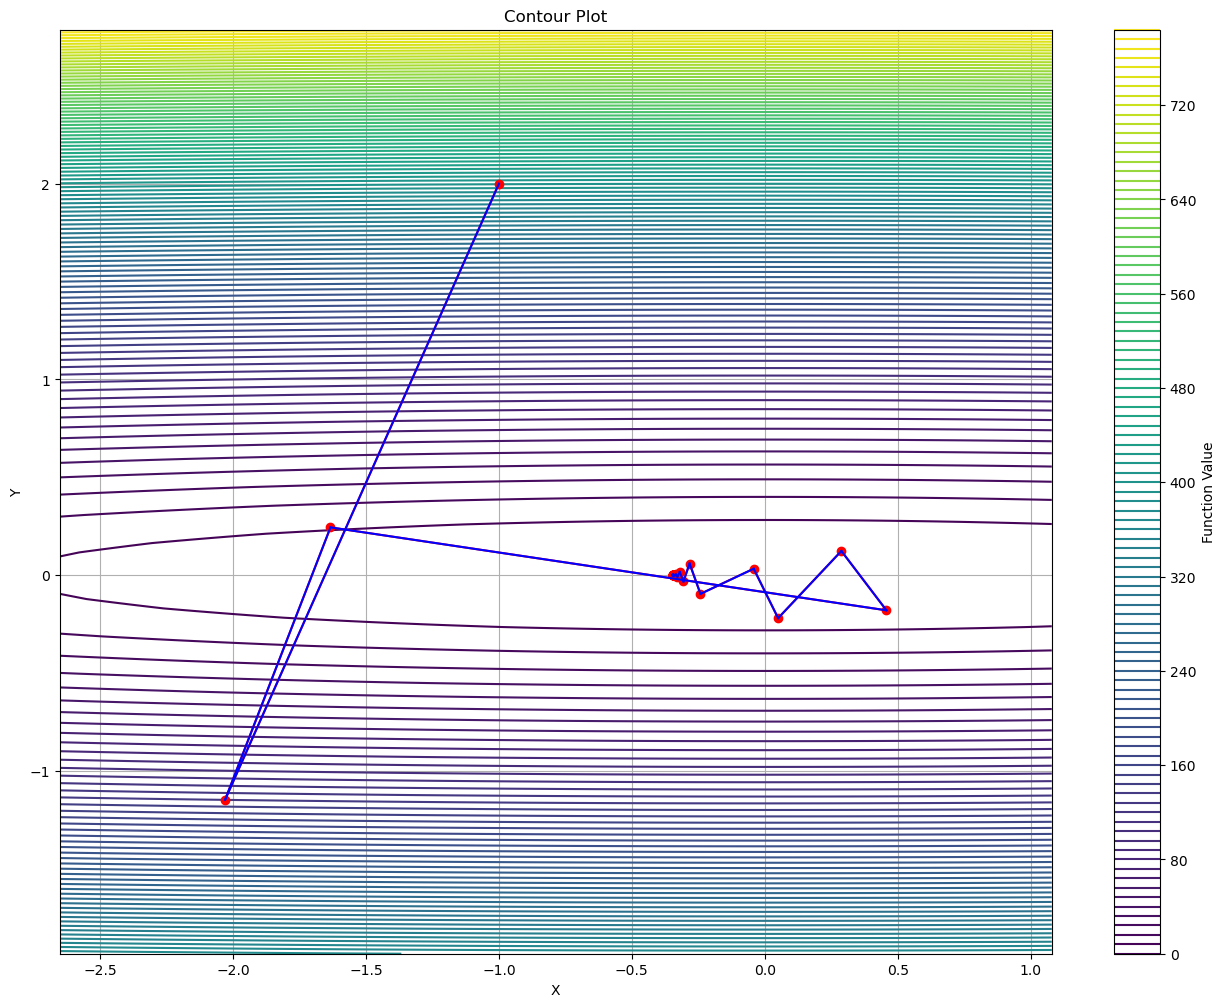

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def plot_contours(func, num_points=100, path=None, expand_factor=1.5):
    # Convert path to numpy array if it's a list
    if isinstance(path, list):
        path = np.array(path)

    # Calculate range based on path array
    if path is not None:
        min_x = np.min(path[:, 0])
        max_x = np.max(path[:, 0])
        min_y = np.min(path[:, 1])
        max_y = np.max(path[:, 1])

        # Calculate expanded range
        range_x = max_x - min_x
        range_y = max_y - min_y
        center_x = (min_x + max_x) / 2
        center_y = (min_y + max_y) / 2
        min_x = center_x - expand_factor * range_x / 2
        max_x = center_x + expand_factor * range_x / 2
        min_y = center_y - expand_factor * range_y / 2
        max_y = center_y + expand_factor * range_y / 2
    else:
        min_x, max_x = -10, 10  # Default range if path is not provided
        min_y, max_y = -10, 10  # Default range if path is not provided

    # Generate grid of (x, y) points
    x = np.linspace(min_x, max_x, num_points)
    y = np.linspace(min_y, max_y, num_points)
    X, Y = np.meshgrid(x, y)

    # Initialize array to store function values
    Z = np.zeros_like(X)

    # Evaluate function at each grid point
    for i in range(num_points):
        for j in range(num_points):
            Z[i, j], _, _ = func(np.array([X[i, j], Y[i, j]]))

    # Plot contour plot
    plt.figure(figsize=(8*2, 6*2))
    contour_plot = plt.contour(X, Y, Z, levels=100)  # Adjust levels as needed

    # Add labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contour Plot')

    # Plot path if provided
    if path is not None:
        plt.plot(path[:, 0], path[:, 1], marker='o', color='red', scalex=True, scaley=True)  # Plot points
        for i in range(1, len(path)):
            plt.plot([path[i-1, 0], path[i, 0]], [path[i-1, 1], path[i, 1]], color='blue')  # Plot connecting lines

    # Add color bar
    plt.colorbar(contour_plot, label='Function Value')

    # Adjust axis limits for expansion
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)

    # Show plot
    plt.grid(True)
    plt.show()

# Example usage:
# plot_contours(e.quadratic_1, path=minimizer.path, expand_factor=1.5)  # Uncomment and replace with your function and path as needed



plot_contours(e.quadratic_2, num_points=100 ,path=minimizer.path) 

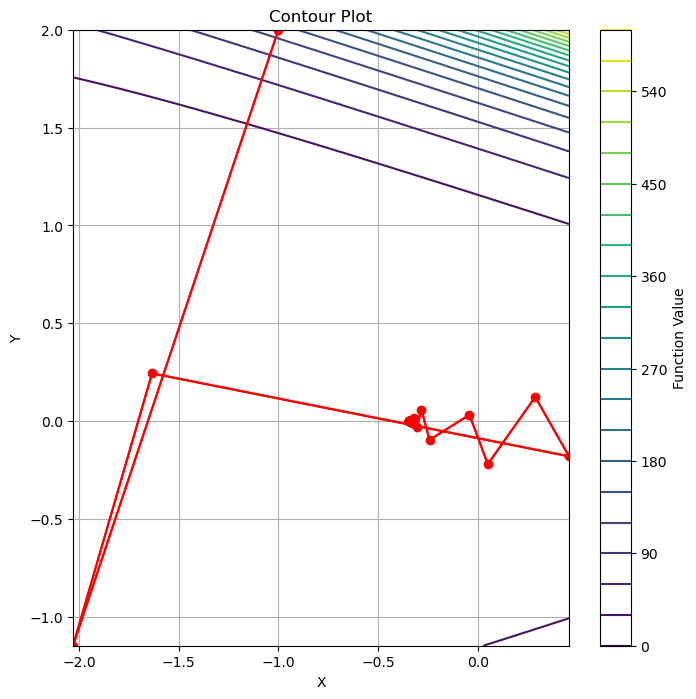

In [127]:
import matplotlib.pyplot as plt
import numpy as np

def plot_contours(func, num_points=100, path=None, expand_factor=1.5, stretch_factor=1.0):
    # Convert path to numpy array if it's a list
    if isinstance(path, list):
        path = np.array(path)

    # Calculate range based on path array
    if path is not None:
        min_x = np.min(path[:, 0])
        max_x = np.max(path[:, 0])
        min_y = np.min(path[:, 1])
        max_y = np.max(path[:, 1])

        # Calculate expanded range
        range_x = max_x - min_x
        range_y = max_y - min_y
        center_x = (min_x + max_x) / 2
        center_y = (min_y + max_y) / 2
        min_x = center_x - expand_factor * range_x / 2
        max_x = center_x + expand_factor * range_x / 2
        min_y = center_y - expand_factor * range_y / 2
        max_y = center_y + expand_factor * range_y / 2
    else:
        min_x, max_x = -10, 10  # Default range if path is not provided
        min_y, max_y = -10, 10  # Default range if path is not provided

    # Calculate adjusted aspect ratio
    aspect_ratio = (max_y - min_y) / (max_x - min_x) * stretch_factor

    # Generate grid of (x, y) points with adjusted aspect ratio
    num_points_y = int(num_points * aspect_ratio)
    x = np.linspace(min_x, max_x, num_points)
    y = np.linspace(min_y, max_y, num_points_y)
    X, Y = np.meshgrid(x, y)

    # Initialize array to store function values
    Z = np.zeros_like(X)

    # Evaluate function at each grid point
    for i in range(num_points_y):
        for j in range(num_points):
            Z[i, j], _, _ = func(np.array([X[i, j], Y[i, j]]))

    # Plot contour plot
    plt.figure(figsize=(8, 8))
    contour_plot = plt.contour(X, Y, Z, levels=20)  # Adjust levels as needed

    # Add labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contour Plot')

    # Plot path if provided
    if path is not None:
        plt.plot(path[:, 0], path[:, 1], marker='o', color='red')  # Plot points
        for i in range(1, len(path)):
            plt.plot([path[i-1, 0], path[i, 0]], [path[i-1, 1], path[i, 1]], color='red', scalex=True, scaley=True)  # Plot connecting lines

    # Add color bar
    plt.colorbar(contour_plot, label='Function Value')

    # Show plot
    plt.grid(True)
    plt.show()


plot_contours(e.exponential_function, num_points=100 ,path=minimizer.path,expand_factor=1, stretch_factor=1) 